## **IMDB Review**

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import io
import string
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
import spacy
import re
import en_core_web_sm                              # Loading the language package to be utilised for spacy
nlp = en_core_web_sm.load()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import string
!pip install shap
import shap
import spacy
!pip install eli5
import eli5
import pickle
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix
warnings.simplefilter('ignore')
sns.set(style="white", palette="muted", color_codes=True)
spacy_nlp = spacy.load('en_core_web_sm')
shap.initjs()
outputdir = 'Model_Ouput'
if not os.path.exists(outputdir):
    os.makedirs(outputdir)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 356 kB 6.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491637 sha256=471134b3c17eca12e23074ddfabdaab04360ad3a1cedfa42e1e1dc8e35ceac02
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
     |████████████████████████████████| 106 kB 5.4 MB/s 


The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


In [3]:
df = pd.read_csv('/content/drive/MyDrive/820 Project/imdb_master.csv',encoding='ISO-8859-1', index_col= [0])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   type    100000 non-null  object
 1   review  100000 non-null  object
 2   label   100000 non-null  object
 3   file    100000 non-null  object
dtypes: object(4)
memory usage: 3.8+ MB


In [5]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'label'.
df['label_encoded']= label_encoder.fit_transform(df['label'])

df = df[["review","label_encoded"]]
df = df[df['label_encoded']!=2]
df.head()

,review,label_encoded
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [6]:
df.tail()

,review,label_encoded
49995,"Seeing as the vote average was pretty low, and...",1
49996,"The plot had some wretched, unbelievable twist...",1
49997,I am amazed at how this movie(and most others ...,1
49998,A Christmas Together actually came before my t...,1
49999,Working-class romantic drama from director Mar...,1


## **Punctuation**

In [7]:
# Function to remove punctuations and digits from the text
def removepunctuation(text):
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'m", " am", text)
    
    p = set(string.punctuation) # p take all the punctuations, punctuations displayed below
    text=text.lower() # convert text to lower case
    words=text.split() # split the text into words
    ctext=[]
    for i in range(10): #adding numbers from 0 - 9 to p 
        p.add(str(i))
    for i in words:
        t=''.join([x for x in i.encode("ascii","ignore").decode("ascii") if x not in p]) # ignoring non ascii charecters and numbers
        ctext.append(t)
    return " ".join([i for i in ctext]) # joining the cleaned words to text
#print(string.punctuation)


review_unclean=[i for i in df.review]
cleaned=[]
for i in review_unclean:
    try:
        ctxt=removepunctuation(i)
        if len(ctxt)==0: raise()
        cleaned.append(ctxt)
    except:
        cleaned.append("NAN")
df['Clean_Text'] = cleaned  # attaching the cleaned data as a new column to the dataset


In [8]:
df

,review,label_encoded,Clean_Text
0,Once again Mr. Costner has dragged out a movie...,0,once again mr costner has dragged out a movie ...
1,This is an example of why the majority of acti...,0,this is an example of why the majority of acti...
2,"First of all I hate those moronic rappers, who...",0,first of all i hate those moronic rappers who ...
3,Not even the Beatles could write songs everyon...,0,not even the beatles could write songs everyon...
4,Brass pictures (movies is not a fitting word f...,0,brass pictures movies is not a fitting word fo...
...,...,...,...
49995,"Seeing as the vote average was pretty low, and...",1,seeing as the vote average was pretty low and ...
49996,"The plot had some wretched, unbelievable twist...",1,the plot had some wretched unbelievable twists...
49997,I am amazed at how this movie(and most others ...,1,i am amazed at how this movieand most others h...
49998,A Christmas Together actually came before my t...,1,a christmas together actually came before my t...


# **Tokenization**

In [9]:
def tokens(text):
  text = nltk.word_tokenize(text)
  return text

In [10]:
df['tokenised'] = df['Clean_Text'].apply(lambda x:tokens(x))

In [11]:
df

,review,label_encoded,Clean_Text,tokenised
0,Once again Mr. Costner has dragged out a movie...,0,once again mr costner has dragged out a movie ...,"[once, again, mr, costner, has, dragged, out, ..."
1,This is an example of why the majority of acti...,0,this is an example of why the majority of acti...,"[this, is, an, example, of, why, the, majority..."
2,"First of all I hate those moronic rappers, who...",0,first of all i hate those moronic rappers who ...,"[first, of, all, i, hate, those, moronic, rapp..."
3,Not even the Beatles could write songs everyon...,0,not even the beatles could write songs everyon...,"[not, even, the, beatles, could, write, songs,..."
4,Brass pictures (movies is not a fitting word f...,0,brass pictures movies is not a fitting word fo...,"[brass, pictures, movies, is, not, a, fitting,..."
...,...,...,...,...
49995,"Seeing as the vote average was pretty low, and...",1,seeing as the vote average was pretty low and ...,"[seeing, as, the, vote, average, was, pretty, ..."
49996,"The plot had some wretched, unbelievable twist...",1,the plot had some wretched unbelievable twists...,"[the, plot, had, some, wretched, unbelievable,..."
49997,I am amazed at how this movie(and most others ...,1,i am amazed at how this movieand most others h...,"[i, am, amazed, at, how, this, movieand, most,..."
49998,A Christmas Together actually came before my t...,1,a christmas together actually came before my t...,"[a, christmas, together, actually, came, befor..."


## **Word Count**

In [12]:
df["word_count"] = ""
for i in range(len(df)):
  df['word_count'] [i]= len(df['tokenised'][i])

In [13]:
df

,review,label_encoded,Clean_Text,tokenised,word_count
0,Once again Mr. Costner has dragged out a movie...,0,once again mr costner has dragged out a movie ...,"[once, again, mr, costner, has, dragged, out, ...",171
1,This is an example of why the majority of acti...,0,this is an example of why the majority of acti...,"[this, is, an, example, of, why, the, majority...",237
2,"First of all I hate those moronic rappers, who...",0,first of all i hate those moronic rappers who ...,"[first, of, all, i, hate, those, moronic, rapp...",225
3,Not even the Beatles could write songs everyon...,0,not even the beatles could write songs everyon...,"[not, even, the, beatles, could, write, songs,...",315
4,Brass pictures (movies is not a fitting word f...,0,brass pictures movies is not a fitting word fo...,"[brass, pictures, movies, is, not, a, fitting,...",239
...,...,...,...,...,...
49995,"Seeing as the vote average was pretty low, and...",1,seeing as the vote average was pretty low and ...,"[seeing, as, the, vote, average, was, pretty, ...",120
49996,"The plot had some wretched, unbelievable twist...",1,the plot had some wretched unbelievable twists...,"[the, plot, had, some, wretched, unbelievable,...",53
49997,I am amazed at how this movie(and most others ...,1,i am amazed at how this movieand most others h...,"[i, am, amazed, at, how, this, movieand, most,...",419
49998,A Christmas Together actually came before my t...,1,a christmas together actually came before my t...,"[a, christmas, together, actually, came, befor...",182


In [14]:
w_c = df.groupby('label_encoded')['word_count'].sum()

In [15]:
w_c

label_encoded
0    5803096
1    5878633
Name: word_count, dtype: int64

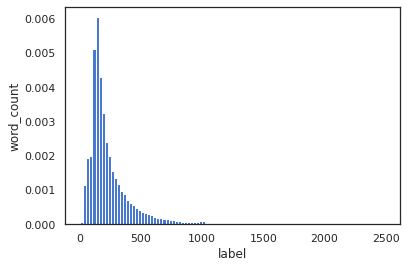

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.hist(df['word_count'], density=True, bins=100)  # density=False would make counts
plt.ylabel('word_count')
plt.xlabel('label');

## **Character Count**

In [17]:
# character count character
df['stripped']=''
df['Char_count']=''
for i in range(len(df)):
  df['stripped'][i] = df['Clean_Text'][i].replace(" ", "")
  df['Char_count'][i] = len(df['stripped'][i])
df=df.drop('stripped',axis=1)

In [18]:
counts = df.groupby('label_encoded')['Char_count'].sum()

In [19]:
counts

label_encoded
0    25378285
1    26083391
Name: Char_count, dtype: int64

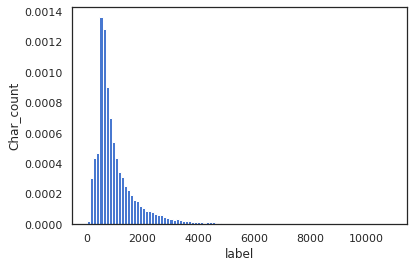

In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.hist(df['Char_count'], density=True, bins=100)  # density=False would make counts
plt.ylabel('Char_count')
plt.xlabel('label');

## **Remove Stop words and Lemmatization**

In [21]:
df = df.drop(['tokenised','word_count','Char_count'],axis=1)
df

,review,label_encoded,Clean_Text
0,Once again Mr. Costner has dragged out a movie...,0,once again mr costner has dragged out a movie ...
1,This is an example of why the majority of acti...,0,this is an example of why the majority of acti...
2,"First of all I hate those moronic rappers, who...",0,first of all i hate those moronic rappers who ...
3,Not even the Beatles could write songs everyon...,0,not even the beatles could write songs everyon...
4,Brass pictures (movies is not a fitting word f...,0,brass pictures movies is not a fitting word fo...
...,...,...,...
49995,"Seeing as the vote average was pretty low, and...",1,seeing as the vote average was pretty low and ...
49996,"The plot had some wretched, unbelievable twist...",1,the plot had some wretched unbelievable twists...
49997,I am amazed at how this movie(and most others ...,1,i am amazed at how this movieand most others h...
49998,A Christmas Together actually came before my t...,1,a christmas together actually came before my t...


In [22]:
df.drop(df[df["Clean_Text"]=="NAN"].index,axis = 0,inplace = True) # deleting rows that have no text 
df=df.reset_index(drop='true') # after deleting rows index should be reset
print(df.shape)

(50000, 3)


In [23]:
def lema(text):
    lemmatizer = WordNetLemmatizer()
    #text = text.lower()
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in list(spacy.lang.en.stop_words.STOP_WORDS)+list(string.punctuation)]
    text = [re.sub(r"\d+", "", i) for i in text]
    return ' '.join(text)


In [24]:
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: lema(x))

In [25]:
df

,review,label_encoded,Clean_Text
0,Once again Mr. Costner has dragged out a movie...,0,mr costner dragged movie far longer necessary ...
1,This is an example of why the majority of acti...,0,example majority action film generic boring wo...
2,"First of all I hate those moronic rappers, who...",0,hate moronic rapper couldnt act gun pressed fo...
3,Not even the Beatles could write songs everyon...,0,beatles write song liked walter hill moptop se...
4,Brass pictures (movies is not a fitting word f...,0,brass picture movie fitting word somewhat bras...
...,...,...,...
49995,"Seeing as the vote average was pretty low, and...",1,seeing vote average pretty low fact clerk vide...
49996,"The plot had some wretched, unbelievable twist...",1,plot wretched unbelievable twist chemistry mel...
49997,I am amazed at how this movie(and most others ...,1,amazed movieand average star lower crappy movi...
49998,A Christmas Together actually came before my t...,1,christmas actually came time raised john denve...


# **Count Character and Words after Stop words**

---



### ***After cleaning Word Count***

In [26]:
def tokens(text):
  text = nltk.word_tokenize(text)
  return text

In [27]:
df['tokenised'] = df['Clean_Text'].apply(lambda x:tokens(x))

In [28]:
df

,review,label_encoded,Clean_Text,tokenised
0,Once again Mr. Costner has dragged out a movie...,0,mr costner dragged movie far longer necessary ...,"[mr, costner, dragged, movie, far, longer, nec..."
1,This is an example of why the majority of acti...,0,example majority action film generic boring wo...,"[example, majority, action, film, generic, bor..."
2,"First of all I hate those moronic rappers, who...",0,hate moronic rapper couldnt act gun pressed fo...,"[hate, moronic, rapper, couldnt, act, gun, pre..."
3,Not even the Beatles could write songs everyon...,0,beatles write song liked walter hill moptop se...,"[beatles, write, song, liked, walter, hill, mo..."
4,Brass pictures (movies is not a fitting word f...,0,brass picture movie fitting word somewhat bras...,"[brass, picture, movie, fitting, word, somewha..."
...,...,...,...,...
49995,"Seeing as the vote average was pretty low, and...",1,seeing vote average pretty low fact clerk vide...,"[seeing, vote, average, pretty, low, fact, cle..."
49996,"The plot had some wretched, unbelievable twist...",1,plot wretched unbelievable twist chemistry mel...,"[plot, wretched, unbelievable, twist, chemistr..."
49997,I am amazed at how this movie(and most others ...,1,amazed movieand average star lower crappy movi...,"[amazed, movieand, average, star, lower, crapp..."
49998,A Christmas Together actually came before my t...,1,christmas actually came time raised john denve...,"[christmas, actually, came, time, raised, john..."


In [29]:
df["word_count"] = ""
for i in range(len(df)):
  df['word_count'] [i]= len(df['tokenised'][i])

In [30]:
df

,review,label_encoded,Clean_Text,tokenised,word_count
0,Once again Mr. Costner has dragged out a movie...,0,mr costner dragged movie far longer necessary ...,"[mr, costner, dragged, movie, far, longer, nec...",63
1,This is an example of why the majority of acti...,0,example majority action film generic boring wo...,"[example, majority, action, film, generic, bor...",105
2,"First of all I hate those moronic rappers, who...",0,hate moronic rapper couldnt act gun pressed fo...,"[hate, moronic, rapper, couldnt, act, gun, pre...",99
3,Not even the Beatles could write songs everyon...,0,beatles write song liked walter hill moptop se...,"[beatles, write, song, liked, walter, hill, mo...",141
4,Brass pictures (movies is not a fitting word f...,0,brass picture movie fitting word somewhat bras...,"[brass, picture, movie, fitting, word, somewha...",129
...,...,...,...,...,...
49995,"Seeing as the vote average was pretty low, and...",1,seeing vote average pretty low fact clerk vide...,"[seeing, vote, average, pretty, low, fact, cle...",51
49996,"The plot had some wretched, unbelievable twist...",1,plot wretched unbelievable twist chemistry mel...,"[plot, wretched, unbelievable, twist, chemistr...",24
49997,I am amazed at how this movie(and most others ...,1,amazed movieand average star lower crappy movi...,"[amazed, movieand, average, star, lower, crapp...",195
49998,A Christmas Together actually came before my t...,1,christmas actually came time raised john denve...,"[christmas, actually, came, time, raised, john...",70


In [31]:
w_c_c = df.groupby('label_encoded')['word_count'].sum()

In [32]:
w_c_c

label_encoded
0    2569531
1    2667100
Name: word_count, dtype: int64

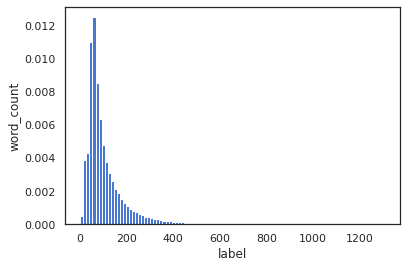

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.hist(df['word_count'], density=True, bins=100)  # density=False would make counts
plt.ylabel('word_count')
plt.xlabel('label');

## ***After cleaning Characters Count***

In [34]:
# character count character
df['stripped']=''
df['Char_count']=''
for i in range(len(df)):
  df['stripped'][i] = df['Clean_Text'][i].replace(" ", "")
  df['Char_count'][i] = len(df['stripped'][i])
df=df.drop('stripped',axis=1)

In [35]:
counts = df.groupby('label_encoded')['Char_count'].sum()

In [36]:
counts

label_encoded
0    15252906
1    16111883
Name: Char_count, dtype: int64

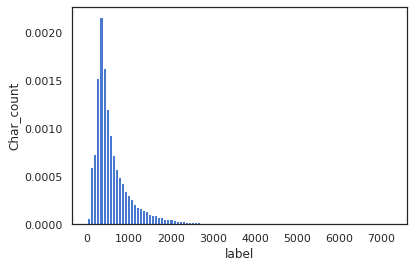

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.hist(df['Char_count'], density=True, bins=100)  # density=False would make counts
plt.ylabel('Char_count')
plt.xlabel('label');

In [38]:
df

,review,label_encoded,Clean_Text,tokenised,word_count,Char_count
0,Once again Mr. Costner has dragged out a movie...,0,mr costner dragged movie far longer necessary ...,"[mr, costner, dragged, movie, far, longer, nec...",63,380
1,This is an example of why the majority of acti...,0,example majority action film generic boring wo...,"[example, majority, action, film, generic, bor...",105,614
2,"First of all I hate those moronic rappers, who...",0,hate moronic rapper couldnt act gun pressed fo...,"[hate, moronic, rapper, couldnt, act, gun, pre...",99,564
3,Not even the Beatles could write songs everyon...,0,beatles write song liked walter hill moptop se...,"[beatles, write, song, liked, walter, hill, mo...",141,787
4,Brass pictures (movies is not a fitting word f...,0,brass picture movie fitting word somewhat bras...,"[brass, picture, movie, fitting, word, somewha...",129,808
...,...,...,...,...,...,...
49995,"Seeing as the vote average was pretty low, and...",1,seeing vote average pretty low fact clerk vide...,"[seeing, vote, average, pretty, low, fact, cle...",51,297
49996,"The plot had some wretched, unbelievable twist...",1,plot wretched unbelievable twist chemistry mel...,"[plot, wretched, unbelievable, twist, chemistr...",24,159
49997,I am amazed at how this movie(and most others ...,1,amazed movieand average star lower crappy movi...,"[amazed, movieand, average, star, lower, crapp...",195,1100
49998,A Christmas Together actually came before my t...,1,christmas actually came time raised john denve...,"[christmas, actually, came, time, raised, john...",70,438


# **Count Ngram, Bigram**

In [39]:
# natural language processing: n-gram ranking
import unicodedata
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
def basic_clean(Clean_Text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  Clean_Text = (unicodedata.normalize('NFKD', Clean_Text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
  words = re.sub(r'[^\w\s]', '', Clean_Text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]
  

In [41]:
#making it a simple list with tolist(). Then assign the results to words.
words = basic_clean(''.join(str(df['Clean_Text'].tolist())))

In [42]:
words[:20] #A list of already cleaned, normalized, and lemmatized words.

['mr',
 'costner',
 'dragged',
 'movie',
 'far',
 'longer',
 'necessary',
 'aside',
 'terrific',
 'sea',
 'rescue',
 'sequence',
 'care',
 'character',
 'ghost',
 'closet',
 'costner',
 'character',
 'realized',
 'early']

In [43]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10] #To find out which bigrams occur the most in this particular sample of reviews

(br, br)             14047
(br, movie)           3296
(br, film)            3224
(look, like)          2988
(special, effect)     2200
(movie, like)         2099
(itbr, br)            2011
(main, character)     1887
(year, old)           1740
(moviebr, br)         1715
dtype: int64

In [44]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12] #To find out which bigrams occur the most in this particular sample of reviews
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12] ##To find out which trigrams occur the most in this particular sample of reviews

Text(0.5, 0, '# of Occurances')

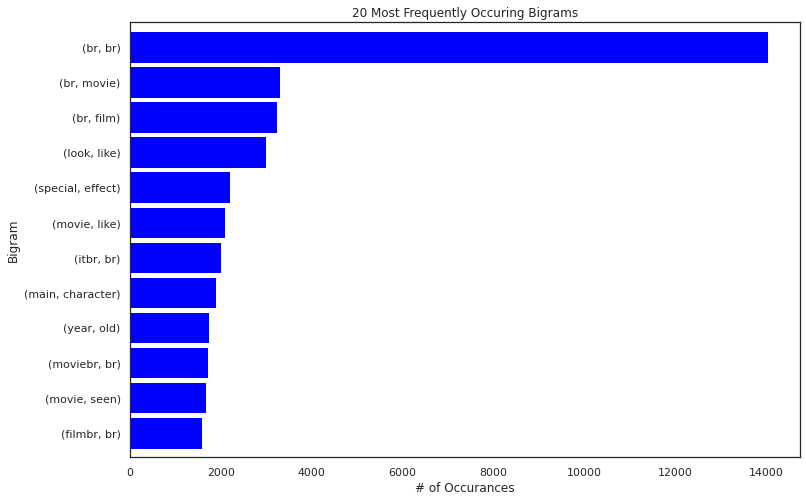

In [45]:
# Horizontal bar graph:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

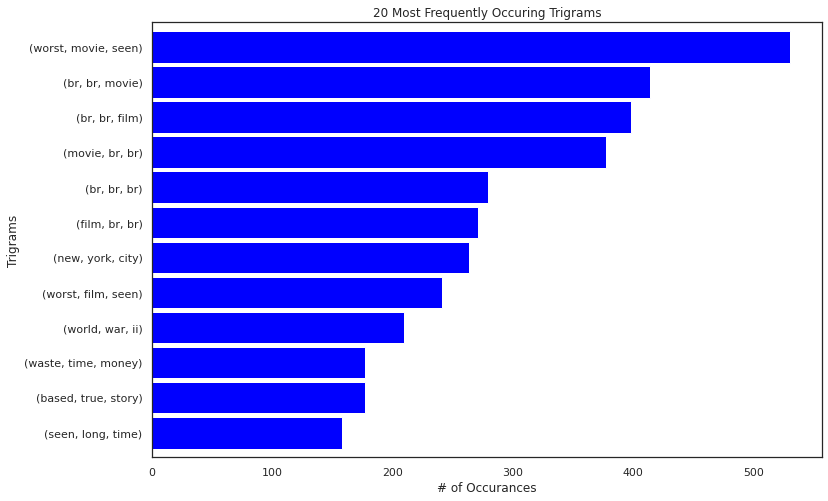

In [46]:
# Horizontal bar graph:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigrams')
plt.xlabel('# of Occurances')

# **Displaying word cloud**

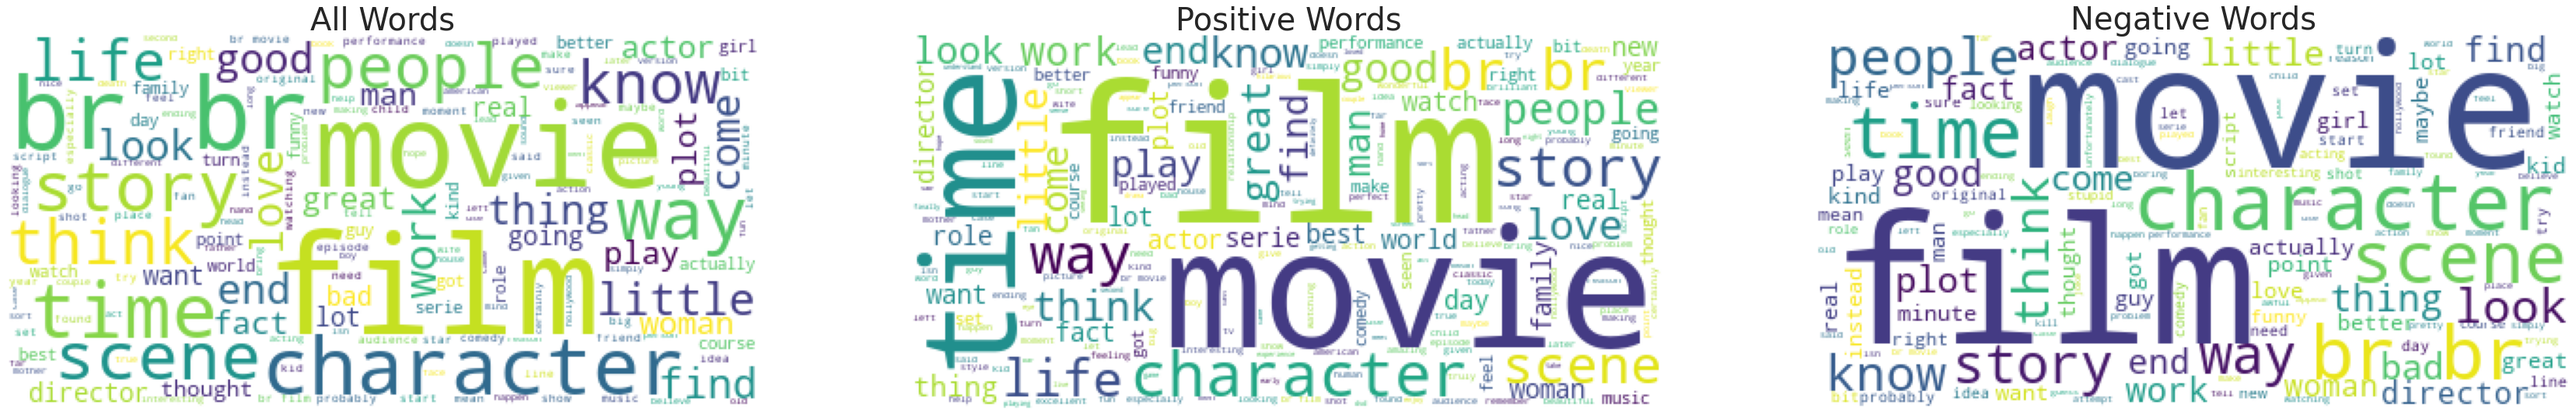

In [47]:
# Displaying word cloud
import matplotlib.pyplot as plt

from wordcloud import WordCloud

All_word = ''.join(df['Clean_Text'].tolist()) # All words in the given corpus
positive_words = ''.join(df[df['label_encoded']==1]['Clean_Text'].tolist()) # All positive words
negative_words = ''.join(df[df['label_encoded']==0]['Clean_Text'].tolist()) # All negative words
category = ['All Words','Positive Words','Negative Words']
data_wordcloud = [All_word,positive_words,negative_words]

plt.figure(figsize=(80,80))
for i in range(0,3):
    t=i+1
    plt.subplot(5, 4, t).set_title(category[i],fontsize=40)
    plt.axis('off')
    plt.imshow(WordCloud(background_color='white').generate(data_wordcloud[i]))
#plt.savefig('Wordcloud.png')
plt.show()

# **TF-IDF**

In [48]:
Clean_Text = df['Clean_Text']
label_encoded = df['label_encoded']

In [49]:
# Termite will help us know, which words provide an import to category
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

category = list(label_encoded.unique())
vectorizer = TfidfVectorizer()
vectorizer.fit(df['Clean_Text']) #Fitting TFIDF vectorizer on df

mat_tfidf_cat0 = vectorizer.transform(df[label_encoded==category[0]]['Clean_Text']) # creating a matrix
category0_score = mat_tfidf_cat0.sum(axis=0) # taking sum of the matrix for all rows
category0_words_frequency = [(word, category0_score[0, idx]) for word, idx in vectorizer.vocabulary_.items()] # form a list all tuple with (words, score) 
df_cat0 = pd.DataFrame(list(sorted(category0_words_frequency, key = lambda x: x[1], reverse=True)),columns=['feature','Positive']) #Sort and form a dataframe
df_cat0 = df_cat0.head(10) # take top 10 row

mat_tfidf_cat1 = vectorizer.transform(df[label_encoded==category[1]]['Clean_Text'])
category0_score = mat_tfidf_cat1.sum(axis=0)
category0_words_frequency = [(word, category0_score[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
df_cat1 = pd.DataFrame(list(sorted(category0_words_frequency, key = lambda x: x[1], reverse=True)),columns=['feature','Negative'])
df_cat1 = df_cat1.head(10)

df_categories = pd.merge(df_cat0,df_cat1,how='outer') #join two dataframes
df_categories.fillna(0,inplace=True) #Fill all nan with 0
df_categories.set_index('feature',inplace=True) # set all words as index
df_categories_norm = (df_categories)/(df_categories.max()-df_categories.min()) # standard normalization

In [50]:
df_categories_norm

,Positive,Negative
feature,,
movie,1.000000,0.967452
br,0.911379,1.000000
film,0.705502,0.943880
bad,0.431902,0.000000
like,0.428696,0.412253
good,0.331531,0.412953
time,0.310525,0.390228
character,0.309248,0.361679
scene,0.266674,0.000000


# **Feature Extraction**

---



# **Machine Learning Model Building with Ngram**

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(df['Clean_Text'],df['label_encoded'],test_size=0.2,random_state=45)

In [ ]:
countvect = CountVectorizer(ngram_range=(1,3))
review_train_vectorize = countvect.fit_transform(xtrain)
review_test_vectorize = countvect.transform(xtest)

### ***Logistic Regression BOW Ngram***

In [ ]:
# Logistic Regression Ngram BOW

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(review_train_vectorize,ytrain)
pred_y_lr=lr.predict(review_test_vectorize)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4924
           1       0.88      0.90      0.89      5076

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

F1-score:0.8936336160670761
Confusion matrix:
[[4326  598]
 [ 493 4583]]


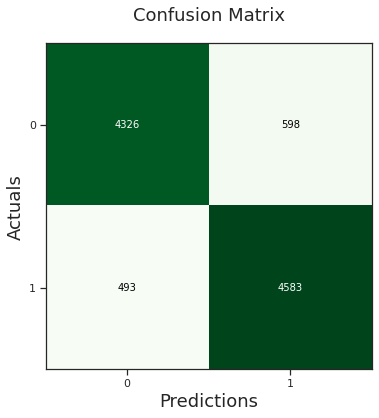

In [ ]:
from sklearn.metrics import accuracy_score
score_1=accuracy_score(ytest,pred_y_lr)
score_1

print(classification_report(ytest, pred_y_lr))
print('F1-score:{0}'.format(f1_score(ytest,pred_y_lr)))
print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,pred_y_lr)
print(c_matrix)
with open(outputdir+'/LR_bow.pkl','wb') as file:
   pickle.dump(lr,file)
 
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### ***Cross Validation***

In [ ]:
# CROSS VALIDATION
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

import numpy as np
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr, review_train_vectorize,ytrain, scoring ='accuracy', n_jobs=-1, cv=3)
print("Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.".format(np.mean(score)*100, np.std(score)*100))

Cross-validation mean accuracy 88.78%, std 0.17.


In [ ]:
score = cross_val_score(lr, review_train_vectorize,ytrain, scoring ='accuracy', n_jobs=-1, cv=5)
print("Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.".format(np.mean(score)*100, np.std(score)*100))

Cross-validation mean accuracy 89.09%, std 0.18.


In [ ]:
score = cross_val_score(lr, review_train_vectorize,ytrain, scoring ='accuracy', n_jobs=-1, cv=10)
print("Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.".format(np.mean(score)*100, np.std(score)*100))

Cross-validation mean accuracy 89.18%, std 0.35.


### ***Naive Byes BOW Ngram (BOW value)***

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4924
           1       0.89      0.88      0.89      5076

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy Score:0.8845
AUCROC Score:0.884614701380607
BOW_cv_train: (40000, 6382621)
BOW_cv_test: (10000, 6382621)
F1-score:0.88517745302714
Confusion matrix:
[[4393  531]
 [ 624 4452]]


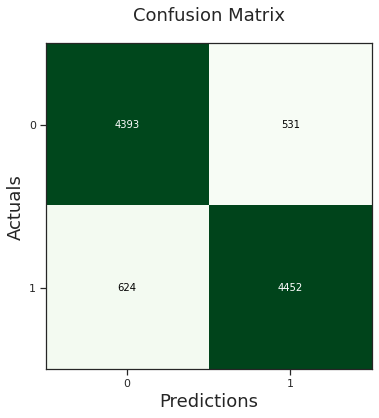

In [ ]:
# Naive Byes Ngram BOW

nb = MultinomialNB()
nb.fit(review_train_vectorize,ytrain)
y_pred_vect = nb.predict(review_test_vectorize)
print(classification_report(ytest,y_pred_vect))
print(f'Accuracy Score:{accuracy_score(ytest,y_pred_vect)}')
print(f'AUCROC Score:{roc_auc_score(ytest,y_pred_vect)}')

print('BOW_cv_train:',review_train_vectorize.shape)
print('BOW_cv_test:',review_test_vectorize.shape)





print('F1-score:{0}'.format(f1_score(ytest,y_pred_vect)))
print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,y_pred_vect)
print(c_matrix)
with open(outputdir+'/naive_bayes_bow.pkl','wb') as file:
    pickle.dump(nb,file)


 
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### ***SVM BOW Ngram***

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4924
           1       0.88      0.90      0.89      5076

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy Score:0.8891
AUC ROC Score:0.8889329790754855
F1-score:0.891752074182528
Confusion matrix:
[[4323  601]
 [ 508 4568]]


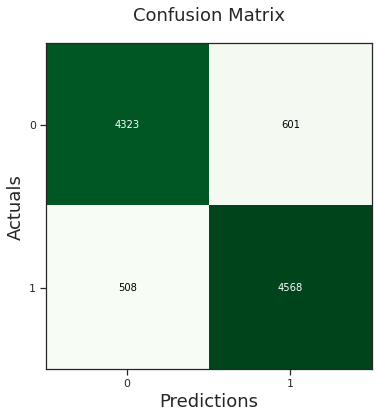

In [ ]:
# SVM Ngram BOW

from sklearn.svm import SVC
from sklearn.metrics import f1_score
#Bow model SVM
svm = SVC(kernel='linear')
svm.fit(review_train_vectorize,ytrain)
ypred_vect_svm = svm.predict(review_test_vectorize)
print(classification_report(ytest,ypred_vect_svm))
print(f'Accuracy Score:{accuracy_score(ytest,ypred_vect_svm)}')
print(f'AUC ROC Score:{roc_auc_score(ytest,ypred_vect_svm)}')
print('F1-score:{0}'.format(f1_score(ytest,ypred_vect_svm)))

print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,ypred_vect_svm)
print(c_matrix)
with open(outputdir+'/SVM_bow.pkl','wb') as file:
    pickle.dump(svm,file)


 
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### ***Models using TF-IDF with Ngram***

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
review_train_tvectorize = vectorizer.fit_transform(xtrain)
review_test_tvectorize = vectorizer.transform(xtest)

### ***Logistic regression TFIDF Ngram***

In [ ]:
# Logistic regression Ngram TFIDF

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(review_train_tvectorize,ytrain)
pred_y_lr=lr.predict(review_test_tvectorize)

In [ ]:
from sklearn.metrics import accuracy_score
score_1=accuracy_score(ytest,pred_y_lr)
score_1

0.8814

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4924
           1       0.87      0.90      0.88      5076

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

F1-score:0.8848320062147988
Confusion matrix:
[[4258  666]
 [ 520 4556]]


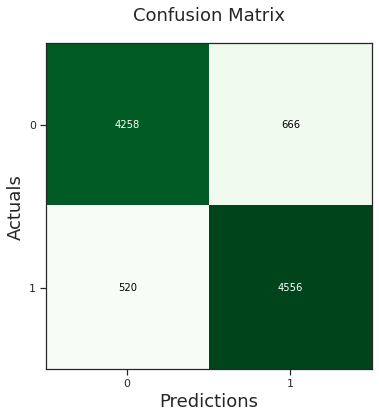

In [ ]:
print(classification_report(ytest, pred_y_lr))

print('F1-score:{0}'.format(f1_score(ytest,pred_y_lr)))
print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,pred_y_lr)
print(c_matrix)
with open(outputdir+'/LR_bow.pkl','wb') as file:
    pickle.dump(lr,file)


 
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### ***Naive Bayes TF-IDF Ngram***

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4924
           1       0.89      0.88      0.89      5076

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy Score:0.8856
AUCROC Score:0.8856830282068369
TFIDF_tv_train: (40000, 6382621)
TFIDF_tv_test: (10000, 6382621)
F1-score:0.8865079365079366
Confusion matrix:
[[4388  536]
 [ 608 4468]]


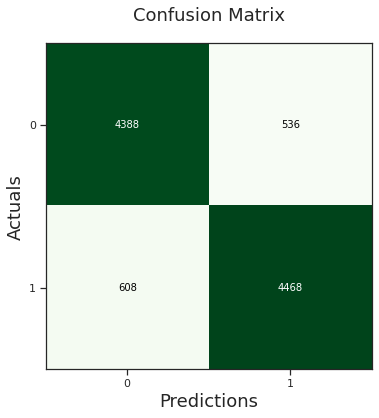

In [ ]:
# Naive Byes Ngram TFIDF

nb = MultinomialNB()
nb.fit(review_train_tvectorize,ytrain)
y_pred_tfidf = nb.predict(review_test_tvectorize)
print(classification_report(ytest,y_pred_tfidf))
print(f'Accuracy Score:{accuracy_score(ytest,y_pred_tfidf)}')
print(f'AUCROC Score:{roc_auc_score(ytest,y_pred_tfidf)}')

print('TFIDF_tv_train:',review_train_tvectorize.shape)
print('TFIDF_tv_test:',review_test_tvectorize.shape)


print('F1-score:{0}'.format(f1_score(ytest,y_pred_tfidf)))
print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,y_pred_tfidf)
print(c_matrix)
with open(outputdir+'/naive_bayes_TFIDF.pkl','wb') as file:
    pickle.dump(nb,file)


 
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### ***SVM TF-IDF Ngram***

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4924
           1       0.89      0.92      0.90      5076

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Accuracy Score:0.8983
AUC ROC Score:0.8980256398438295
F1-score:0.9014248328002327
F1-score:0.9014248328002327
Confusion matrix:
[[4333  591]
 [ 426 4650]]


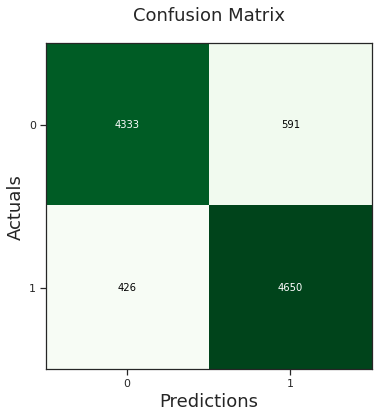

In [ ]:
# SVM Ngram TFIDF

svm = SVC(kernel='linear')

svm.fit(review_train_tvectorize,ytrain)
ypred_tfidf_svm = svm.predict(review_test_tvectorize)
print(classification_report(ytest,ypred_tfidf_svm))
print(f'Accuracy Score:{accuracy_score(ytest,ypred_tfidf_svm)}')
print(f'AUC ROC Score:{roc_auc_score(ytest,ypred_tfidf_svm)}')
print('F1-score:{0}'.format(f1_score(ytest,ypred_tfidf_svm)))


print('F1-score:{0}'.format(f1_score(ytest,ypred_tfidf_svm)))
print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,ypred_tfidf_svm)
print(c_matrix)
with open(outputdir+'/SVM_TFIDF.pkl','wb') as file:
    pickle.dump(svm,file)


 
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# **Machine Learning Model Building with Single gram**

### ***Splitting data into 80/20***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix

xtrain,xtest,ytrain,ytest = train_test_split(Clean_Text,label_encoded,test_size=0.2,random_state=45) #splitting dataset with test size as 20%

In [ ]:

#Creating dataset for Bag of word model
countvect = CountVectorizer()
review_train_vectorize = countvect.fit_transform(xtrain)
review_test_vectorize = countvect.transform(xtest)

#Creating dataset for TFIDF model
tfidf_transform = TfidfTransformer()
review_train_tfidf = tfidf_transform.fit_transform(review_train_vectorize)
review_test_tfidf = tfidf_transform.transform(review_test_vectorize)

In [ ]:
Clean_Text = df['Clean_Text']
label_encoded = df['label_encoded']

### ***Naive Bayes BOW***

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4924
           1       0.88      0.85      0.86      5076

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy Score:0.8639
AUCROC Score:0.8641802201980746
F1-score:0.8631748265808786
Confusion matrix:
[[4346  578]
 [ 783 4293]]


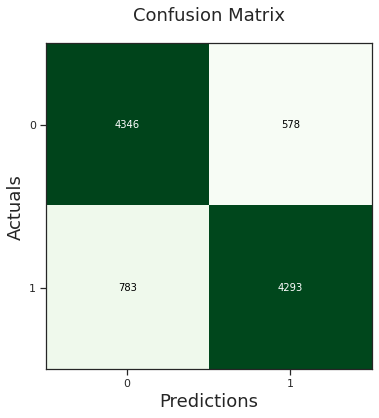

In [ ]:
#Bow model

nb = MultinomialNB()
nb.fit(review_train_vectorize,ytrain)
y_pred_vect = nb.predict(review_test_vectorize)
print(classification_report(ytest,y_pred_vect))
print(f'Accuracy Score:{accuracy_score(ytest,y_pred_vect)}')
print(f'AUCROC Score:{roc_auc_score(ytest,y_pred_vect)}')
print('F1-score:{0}'.format(f1_score(ytest,y_pred_vect)))
print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,y_pred_vect)
print(c_matrix)
with open(outputdir+'/naive_bayes_bow.pkl','wb') as file:
    pickle.dump(nb,file)


 
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### ***Naive Bayes TF-IDF***

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4924
           1       0.88      0.86      0.87      5076

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Accuracy Score:0.869
AUCROC Score:0.8691977794549652
F1-score:0.8690261947610477
Confusion matrix:
[[4344  580]
 [ 730 4346]]


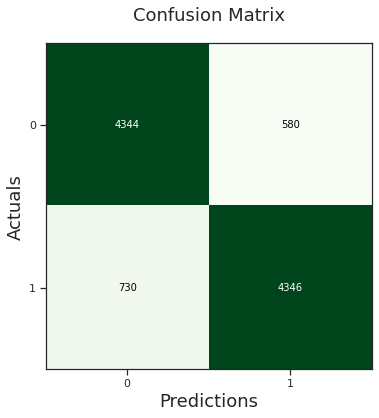

In [ ]:
# TF-IDF model

nb.fit(review_train_tfidf,ytrain)
ypred_nb_tfidf = nb.predict(review_test_tfidf)
print(classification_report(ytest,ypred_nb_tfidf))
print(f'Accuracy Score:{accuracy_score(ytest,ypred_nb_tfidf)}')
print(f'AUCROC Score:{roc_auc_score(ytest,ypred_nb_tfidf)}')
print('F1-score:{0}'.format(f1_score(ytest,ypred_nb_tfidf)))
print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,ypred_nb_tfidf)
print(c_matrix)

with open(outputdir+'/naive_bayes_tfidf.pkl','wb') as file:
    pickle.dump(nb,file)
  
  
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### ***SVM BOW***

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4924
           1       0.87      0.86      0.86      5076

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy Score:0.8606
AUC ROC Score:0.8606255589291351
F1-score:0.862171247775361
Confusion matrix:
[[4246  678]
 [ 716 4360]]


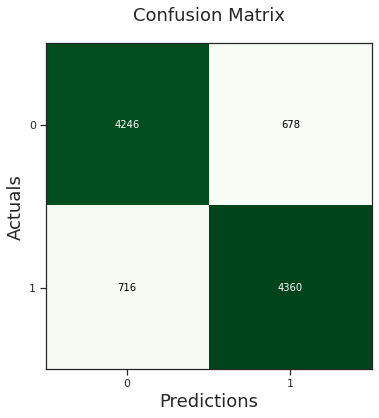

In [ ]:
#Bow model

svm = SVC(kernel='linear')
svm.fit(review_train_vectorize,ytrain)
ypred_vect_svm = svm.predict(review_test_vectorize)
print(classification_report(ytest,ypred_vect_svm))
print(f'Accuracy Score:{accuracy_score(ytest,ypred_vect_svm)}')
print(f'AUC ROC Score:{roc_auc_score(ytest,ypred_vect_svm)}')
print('F1-score:{0}'.format(f1_score(ytest,ypred_vect_svm)))
print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,ypred_vect_svm)
print(c_matrix)


with open(outputdir+'/svm_bow.pkl','wb') as file:
    pickle.dump(svm,file)


 
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### ***SVM TF-IDF***

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4924
           1       0.89      0.90      0.90      5076

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy Score:0.8932
AUC ROC Score:0.8930780167449888
F1-score:0.862171247775361
Confusion matrix:
[[4246  678]
 [ 716 4360]]


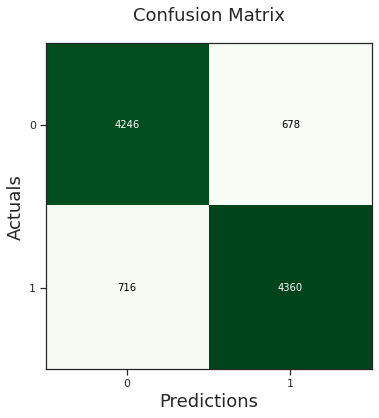

In [ ]:
#TFIDF model

svm.fit(review_train_tfidf,ytrain)
ypred_tfidf_svm = svm.predict(review_test_tfidf)
print(classification_report(ytest,ypred_tfidf_svm))
print(f'Accuracy Score:{accuracy_score(ytest,ypred_tfidf_svm)}')
print(f'AUC ROC Score:{roc_auc_score(ytest,ypred_tfidf_svm)}')
print('F1-score:{0}'.format(f1_score(ytest,ypred_tfidf_svm)))
print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,ypred_tfidf_svm)
print(c_matrix)

with open(outputdir+'/svm_tfidf.pkl','wb') as file:
    pickle.dump(svm,file)

 
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### ***Logistic Regression BOW***

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4924
           1       0.88      0.88      0.88      5076

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy Score:0.8798
AUCROC Score:0.8797296527389687
F1-score:0.881925343811395
Confusion matrix:
[[4309  615]
 [ 587 4489]]


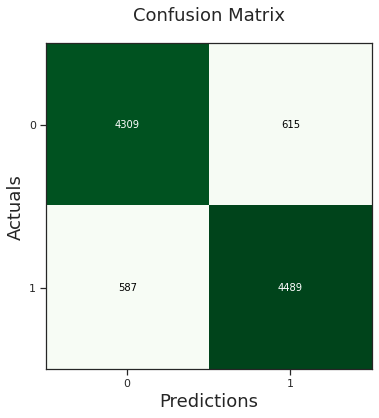

In [ ]:
#Bow model

lr = LogisticRegression()
lr.fit(review_train_vectorize,ytrain)
y_pred_lr = lr.predict(review_test_vectorize)
print(classification_report(ytest,y_pred_lr))
print(f'Accuracy Score:{accuracy_score(ytest,y_pred_lr)}')
print(f'AUCROC Score:{roc_auc_score(ytest,y_pred_lr)}')
print('F1-score:{0}'.format(f1_score(ytest,y_pred_lr)))
print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,y_pred_lr)
print(c_matrix)

with open(outputdir+'/logisticregression_bow.pkl','wb') as file:
    pickle.dump(lr,file)



fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### ***Logistic Regression TF-IDF***

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4924
           1       0.88      0.90      0.89      5076

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy Score:0.8899
AUCROC Score:0.8896723498997208
F1-score:0.8929508993680116
Confusion matrix:
[[4307  617]
 [ 484 4592]]


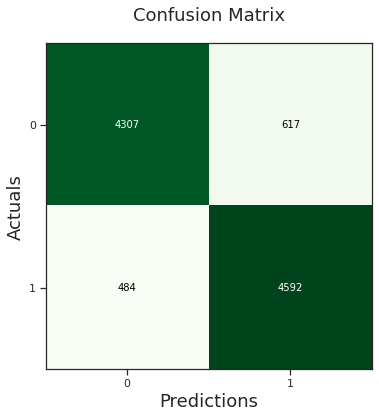

In [ ]:
# TF-IDF model

lr.fit(review_train_tfidf,ytrain)
ypred_lr_tfidf = lr.predict(review_test_tfidf)
print(classification_report(ytest,ypred_lr_tfidf))
print(f'Accuracy Score:{accuracy_score(ytest,ypred_lr_tfidf)}')
print(f'AUCROC Score:{roc_auc_score(ytest,ypred_lr_tfidf)}')
print('F1-score:{0}'.format(f1_score(ytest,ypred_lr_tfidf)))
print('Confusion matrix:')
c_matrix=confusion_matrix(ytest,ypred_lr_tfidf)
print(c_matrix)

with open(outputdir+'/logisticregression_tfidf.pkl','wb') as file:
    pickle.dump(lr,file)

 
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()